In [39]:
import csv

In [40]:
#get column names from CSV
with open('wheatData.csv', 'r') as file:
    wheat=csv.DictReader(file, delimiter=',')
    print(wheat.fieldnames)
   # wheatTypes={}
    #for row in wheat:
        
        
  

['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'wheatLabel']


In [41]:
#get unique values from wheatLabel column for classification 

wheatTypes=[] #create a list
with open('wheatData.csv', 'r') as file:
    wheat=csv.DictReader(file, delimiter=',')

    for row in wheat:
        wheatTypes.append(row['wheatLabel'])
wheatTypes=set(wheatTypes) #convert list to set to remove duplicates 
wheatTypes

{'Canadian', 'Kama', 'Rosa '}

In [42]:
#import csv  using pandas
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
df =  pd.read_csv('wheatData.csv')
print (df.head())

    area  perimeter  compactness  length of kernel  width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   asymmetry coefficient  length of kernel groove wheatLabel  
0                  2.221                    5.220       Kama  
1                  1.018                    4.956       Kama  
2                  2.699                    4.825       Kama  
3                  2.259                    4.805       Kama  
4                  1.355                    5.175       Kama  


In [47]:
df.count()

area                       210
perimeter                  210
compactness                210
length_of_kernel           210
width_of_kernel            210
asymmetry_coefficient      210
length_of_kernel_groove    210
wheatLabel                 210
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coefficient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   wheatLabel               210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [7]:
df.shape

(210, 8)

In [8]:
df.wheatLabel[df.wheatLabel=='Kama'].count()


70

In [49]:
df.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [46]:
#columns have a space in some of the names, may cause issues.. this is the fix
df.columns = df.columns.str.replace(' ', '_')
#Rosa has a space after it in the data... this is the fix!!!
df.wheatLabel = df.wheatLabel.str.replace(' ','') 

Text(0.5, 0, 'Area')

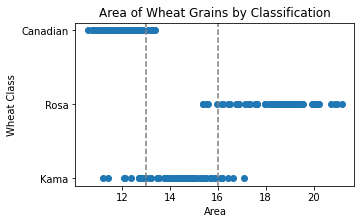

In [28]:
#create scatter plot to show area / wheat grains

fig,ax = plt.subplots(figsize=(5,3))
ax.scatter(x=df['area'], y=df['wheatLabel'])
ax.axvline(13, linestyle='--', color='gray')
ax.axvline(16, linestyle='--', color='gray')
ax.set_title("Area of Wheat Grains by Classification")
ax.set_ylabel("Wheat Class")
ax.set_xlabel("Area")



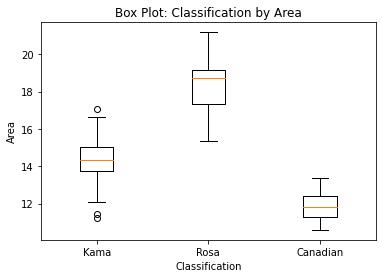

In [52]:
#boxplot
data= [df['area'][df.wheatLabel=='Kama'], df['area'][df.wheatLabel=='Rosa'], df['area'][df.wheatLabel=='Canadian']]
plt.boxplot(data)
plt.xticks([1,2,3],["Kama", "Rosa", "Canadian"])
plt.xlabel("Classification")
plt.ylabel("Area")
plt.title("Box Plot: Classification by Area")
plt.show()

In [14]:
df.wheatLabel[110]

'Rosa'

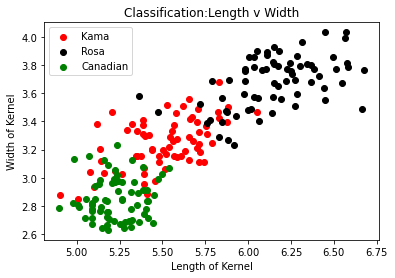

In [54]:
plt.scatter(x=df['length_of_kernel'][df.wheatLabel=='Kama'], y=df['width_of_kernel'][df.wheatLabel=='Kama'], color='Red', label='Kama')
plt.scatter(x=df['length_of_kernel'][df.wheatLabel=='Rosa'], y=df['width_of_kernel'][df.wheatLabel=='Rosa'], color='Black', label='Rosa')
plt.scatter(x=df['length_of_kernel'][df.wheatLabel=='Canadian'], y=df['width_of_kernel'][df.wheatLabel=='Canadian'], color='Green', label='Canadian')


#['length_of_kernel'][df.wheatLabel=='Kama']
plt.legend()
plt.xlabel("Length of Kernel")
plt.ylabel("Width of Kernel")
plt.title("Classification:Length v Width")
plt.show()

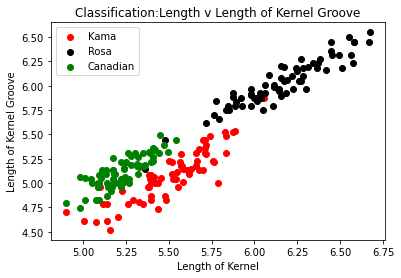

In [57]:

plt.scatter(x=df['length_of_kernel'][df.wheatLabel=='Kama'], y=df['length_of_kernel_groove'][df.wheatLabel=='Kama'], color='Red', label='Kama')
plt.scatter(x=df['length_of_kernel'][df.wheatLabel=='Rosa'], y=df['length_of_kernel_groove'][df.wheatLabel=='Rosa'], color='Black', label='Rosa')
plt.scatter(x=df['length_of_kernel'][df.wheatLabel=='Canadian'], y=df['length_of_kernel_groove'][df.wheatLabel=='Canadian'], color='Green', label='Canadian')

plt.legend()
plt.xlabel("Length of Kernel")
plt.ylabel("Length of Kernel Groove")
plt.title("Classification:Length v Length of Kernel Groove")
plt.show()


In [44]:
df.columns


Index(['area', 'perimeter', 'compactness', 'length of kernel',
       'width of kernel', 'asymmetry coefficient', 'length of kernel groove',
       'wheatLabel'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coefficient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   wheatLabel               210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [18]:
df.area[df.wheatLabel=='Kama']


0     15.26
1     14.88
2     14.29
3     13.84
4     16.14
      ...  
65    12.88
66    14.34
67    14.01
68    14.37
69    12.73
Name: area, Length: 70, dtype: float64

In [42]:
#randomise the csv and make a 80:20 split 
df_shuffled=df.sample(frac=1).reset_index(drop=True) 
#split the csv 168 = 80% of rows
test = df_shuffled[168:] #test
training = df_shuffled[:168] #train
#do a check to see the weighting of each classification
print(' kama count:',training.wheatLabel[training.wheatLabel=='Kama'].count(),
'\n rosa count:', training.wheatLabel[training.wheatLabel=='Rosa'].count(),
'\n canadian count:',training.wheatLabel[training.wheatLabel=='Canadian'].count(),
)


 kama count: 55 
 rosa count: 54 
 canadian count: 59


In [72]:
#convert test and training set to csv
test.to_csv("test.csv", index=False)
training.to_csv("training.csv", index=False)

In [71]:
training

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheatLabel
0,10.93,12.80,0.8390,5.046,2.717,5.398,5.045,Canadian
1,15.05,14.68,0.8779,5.712,3.328,2.129,5.360,Kama
2,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,Rosa
3,16.87,15.65,0.8648,6.139,3.463,3.696,5.967,Rosa
4,11.81,13.45,0.8198,5.413,2.716,4.898,5.352,Canadian
...,...,...,...,...,...,...,...,...
163,14.70,14.21,0.9153,5.205,3.466,1.767,4.649,Kama
164,18.94,16.49,0.8750,6.445,3.639,5.064,6.362,Rosa
165,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,Rosa
166,12.08,13.23,0.8664,5.099,2.936,1.415,4.961,Kama


In [67]:
#get a 80:20 split of each classification

kama = df_shuffled[df_shuffled.wheatLabel=='Kama'].reset_index(drop=True) 
kTest = kama[56:]
kTrain =kama[:56]
rosa = df_shuffled[df_shuffled.wheatLabel=='Rosa'].reset_index(drop=True)
rTest = rosa[56:]
rTrain=rosa[:56]
canadian = df_shuffled[df_shuffled.wheatLabel=='Canadian'].reset_index(drop=True)
cTest = canadian[56:]
cTrain = canadian[:56]
#concantonate each class split into one big dataset
uwTest = pd.concat([kTest, cTest, rTest]).reset_index(drop=True)
uwTraining = pd.concat([kTrain,cTrain,rTrain]).reset_index(drop=True)
#check weighting
print(' kama count:',uwTraining.wheatLabel[uwTraining.wheatLabel=='Kama'].count(),
'\n rosa count:', uwTraining.wheatLabel[uwTraining.wheatLabel=='Rosa'].count(),
'\n canadian count:',uwTraining.wheatLabel[uwTraining.wheatLabel=='Canadian'].count(),
)




 kama count: 56 
 rosa count: 56 
 canadian count: 56


In [73]:
#convert to csv
uwTraining.to_csv("uwTraining.csv", index=False)
uwTest.to_csv("uwTest.csv", index=False)